In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [171]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve

In [6]:
coranDf = pd.read_excel('Coran.xlsx')

In [7]:
matrixTFIDF = pd.read_excel('matrixTFIDF.xlsx')

In [8]:
coranDf.head()

,Unnamed: 0,Unnamed: 1,SORANO,SORATYPE,SORANAME,Lemmes
0,0,0,1,مكية,الفاتحة,اسم الله رحم رحم
1,1,1,1,مكية,الفاتحة,حمد الله رب عالم
2,2,2,1,مكية,الفاتحة,رحم رحم
3,3,3,1,مكية,الفاتحة,مالك يوم دين
4,4,4,1,مكية,الفاتحة,عبد استعان


In [11]:
coranDf.shape

(6236, 6)

In [10]:
coranDf.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'SORANO', 'SORATYPE', 'SORANAME', 'Lemmes'], dtype='object')

In [19]:
coranDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6236 non-null   int64 
 1   Unnamed: 1  6236 non-null   int64 
 2   SORANO      6236 non-null   int64 
 3   SORATYPE    6236 non-null   object
 4   SORANAME    6236 non-null   object
 5   Lemmes      6229 non-null   object
dtypes: int64(3), object(3)
memory usage: 292.4+ KB


In [17]:
coranDf[coranDf.isnull().any(axis=1)]

,Unnamed: 0,Unnamed: 1,SORANO,SORATYPE,SORANAME,Lemmes
4133,4133,1,40,مكية,غافر,NaN
4218,4218,1,41,مكية,فصلت,NaN
4272,4272,1,42,مكية,الشورى,NaN
4325,4325,1,43,مكية,الزخرف,NaN
4414,4414,1,44,مكية,الدخان,NaN
4473,4473,1,45,مكية,الجاثية,NaN
4510,4510,1,46,مكية,الأحقاف,NaN


In [27]:
surat = coranDf['SORANAME'].unique()

print(len(surat))
print(surat)

114
['الفاتحة' 'البقرة' 'آل عمران' 'النساء' 'المائدة' 'الأنعام' 'الأعراف'
 'الأنفال' 'التوبة' 'يونس' 'هود' 'يوسف' 'الرعد' 'إبراهيم' 'الحجر' 'النحل'
 'الإسراء' 'الكهف' 'مريم' 'طه' 'الأنبياء' 'الحج' 'المؤمنون' 'النور'
 'الفرقان' 'الشعراء' 'النمل' 'القصص' 'العنكبوت' 'الروم' 'لقمان' 'السجدة'
 'الأحزاب' 'سبأ' 'فاطر' 'يس' 'الصافات' 'ص' 'الزمر' 'غافر' 'فصلت' 'الشورى'
 'الزخرف' 'الدخان' 'الجاثية' 'الأحقاف' 'محمد' 'الفتح' 'الحجرات' 'ق'
 'الذاريات' 'الطور' 'النجم' 'القمر' 'الرحمن' 'الواقعة' 'الحديد' 'المجادلة'
 'الحشر' 'الممتحنة' 'الصف' 'الجمعة' 'المنافقون' 'التغابن' 'الطلاق'
 'التحريم' 'الملك' 'القلم' 'الحاقة' 'المعارج' 'نوح' 'الجن' 'المزمل'
 'المدثر' 'القيامة' 'الإنسان' 'المرسلات' 'النبأ' 'النازعات' 'عبس'
 'التكوير' 'الإنفطار' 'المطففين' 'الإنشقاق' 'البروج' 'الطارق' 'الأعلى'
 'الغاشية' 'الفجر' 'البلد' 'الشمس' 'الليل' 'الضحى' 'الشرح' 'التين' 'العلق'
 'القدر' 'البينة' 'الزلزلة' 'العاديات' 'القارعة' 'التكاثر' 'العصر'
 'الهمزة' 'الفيل' 'قريش' 'الماعون' 'الكوثر' 'الكافرون' 'النصر' 'المسد'
 'الإخلاص

In [20]:
coranDf['SORANAME'].value_counts()

البقرة      286
الشعراء     227
الأعراف     206
آل عمران    199
الصافات     182
           ... 
قريش          4
الإخلاص       4
العصر         3
الكوثر        3
النصر         3
Name: SORANAME, Length: 114, dtype: int64

In [26]:
ayat = coranDf['Lemmes'].unique()

print(len(ayat))
print(ayat)

5966
[' اسم الله رحم رحم' ' حمد الله رب عالم' ' رحم رحم' ... ' شر وسواس خناس'
 ' وسوس صدر إنسان' ' جنة إنسان']


In [24]:
coranDf['Lemmes'].value_counts()

 ألو رب كذب                               31
 ويل مكذب                                 12
 رب عزيز رحم                               8
 اتقى الله أطاع                            8
 آية مؤمن                                  7
                                          ..
 إبراهيم أمة قانت الله حنيف  مشرك          1
 رب عمل سوء جهالة تاب أصلح رب غفور رحم     1
 هاد حرم قص ظلم  ظلم                       1
 متاع يل عذاب أليم                         1
 جنة إنسان                                 1
Name: Lemmes, Length: 5965, dtype: int64

In [28]:
coranDf['SORATYPE'].value_counts()

مكية     4613
مدنية    1623
Name: SORATYPE, dtype: int64

In [35]:
coranDf[['SORATYPE', 'SORANAME']]

,SORATYPE,SORANAME
0,مكية,الفاتحة
1,مكية,الفاتحة
2,مكية,الفاتحة
3,مكية,الفاتحة
4,مكية,الفاتحة
...,...,...
6231,مكية,الناس
6232,مكية,الناس
6233,مكية,الناس
6234,مكية,الناس


In [62]:
vercetsEtClassDf = coranDf[['SORATYPE', 'Lemmes']]
souratesEtClassDf = coranDf[['SORATYPE', 'SORANAME']]

vercetsGroupedByClass = vercetsEtClassDf.groupby(['SORATYPE'])
souratesGroupedByClass = souratesEtClassDf.groupby(['SORATYPE'])

In [60]:
vercetsGroupedByClass.count()

Empty DataFrame
Columns: []
Index: [(مدنية,    أحب الله اتبع أحب الله غفر ذنب الله غفور رحم), (مدنية,    بقرة ذلول أثار أرض سقى حرث مسلمة شية  جاء حق ذبح كاد فعل), (مدنية,    خوف جوع نقص مال نفس ثمرة بشر صابر), (مدنية,    دار آخرة الله خالصة إنسان تمنى موت  صادق), (مدنية,    رب غفر ذنب إسراف أمر ثبت قدم نصر قوم كافر), (مدنية,    سمع سمع), (مدنية,    شد قوة مال ولد استمتع خلاق استمتع خلاق استمتع  خلاق خاض خاض حبط عمل دنيا آخرة خاسر), (مدنية,    فتن فتنة سقط جهنم محيطة كافر), (مدنية,    هودا نصراني اهتدى  ملة إبراهيم حنيف مشرك), (مدنية,   آدم أنبأ اسم أنبأ اسم  أعلم غيب سماء أرض أعلم أبدى  كتم), (مدنية,   آدم سكن زوج جنة رغد شاء قرب شجرة  ظالم), (مدنية,   آمن آمن إنسان  آمن آمن سفيه سفيه علم), (مدنية,   آمن أقسم الله جهد يمين حبط عمل أصبح خاسر), (مدنية,   آمن أنزل الله  آمن أنزل كفر وراء حق مصدق  قتل نبي الله  مؤمن), (مدنية,   آمن الله أنزل أنزل إبراهيم إسماعيل إسحق يعقوب سبط آتى موسى عيسى آتى نبي رب فرق أحد مسلم), (مدنية,   آمن الله أنزل أنزل إبراهيم إسماعيل إسحق يعقوب سبط آتى موسى عيسى نبي رب فرق أحد مسلم), (مدنية,   آمن الله رسول أطاع تولى فريق مؤمن), (مدنية,   آمن الله نبي أنزل اتخذ ولي كثير فاسق), (مدنية,   آمن نزل سورة أنزل سورة محكمة ذكر قتال رأى ب مرض أنظر نظر مغشي موت أولى), (مدنية,   أب ابن أخ زوج عشيرة مال اقترف تجارة خشي كساد مسكن رضي حب الله رسول جهاد سبيل تربص أتى الله أمر الله هدى قوم فاسق), (مدنية,   أتى رسول بينة  بشر هدى كفر تولى استغنى الله الله غني حميد), (مدنية,   أخ قعد طاعون قتل   موت  صادق), (مدنية,   أخفى صدر أبدى علم الله علم سماء أرض الله قدير), (مدنية,   أدرك موت  برج مشيدة أصاب حسنة  الله أصاب سيئة   الله قوم كاد فقه حديث), (مدنية,   أراد أكل اطمأن ب علم صدق  شاهد), (مدنية,   أراد الله رسول دار آخرة الله عد محسنة أجر عظيم), (مدنية,   أسوة حسنة إبراهيم  قوم بريئ عبد الله كفر بدا عداوة بغضاء آمن الله وحد  إبراهيم أب استغفر ملك الله رب توكل أناب مصير), (مدنية,   أصاب كتاب الله مول الله توكل مؤمن), (مدنية,   أعرابي آمن  آمن  أسلم دخل إيمان ب أطاع الله رسول لات عمل  الله غفور رحم), (مدنية,   أفسد أرض  مصلح), (مدنية,   أقام صلاة قام طائفة أخذ سلاح سجد  وراء أتى طائفة أخرى صلى صلى أخذ حذر سلاح ود كفر غفل سلاح متاع مال ميلة واحدة جناح أذى مطر  مريض وضع سلاح أخذ حذر الله عد كافر عذاب مهين), (مدنية,   أمة دعى خير أمر معروف نهي منكر مفلح), (مدنية,   أمر عبد الله رب رب  شهيد دام توفى  رقيب شهيد), (مدنية,   أمنى موت لقي رأى نظر), (مدنية,   أنعم الله أنعم أمسك زوج اتقى الله أخفى الله مبد خشي إنسان الله حق خشي قضى زيد وطر زوج  مؤمن حرج زوج دعي قضى وطر أمر الله مفعول), (مدنية,   أنفق رسول الله انفض الله خزانة سماء أرض منافق فقه), (مدنية,   أنفق طوع كره ت  قوم فاسق), (مدنية,   أهل كتاب أقام توراة إنجيل أنزل رب زاد كثير أنزل رب طغيان كفر أسي قوم كافر), (مدنية,   أهل كتاب تعالى كلمة سواء عبد الله أشرك  اتخذ بعض رب الله ولى  شهد أنا مسلم), (مدنية,   أهل كتاب صد سبيل الله آمن بغى عوج شهيد الله غافل عمل), (مدنية,   أهل كتاب غلا دين حق اتبع هوى قوم ضل أضل كثير ضل سواء سبيل), (مدنية,   أهل كتاب كفر آية الله الله شهيد عمل), (مدنية,   أهل كتاب نقم آمن الله أنزل أنزل فاسق), (مدنية,   إبراهيم إسماعيل إسحق يعقوب سبط  هودا نصراني  أعلم الله أظلم كتم شهادة الله الله غافل عمل), (مدنية,   إبراهيم رب أرن أحيا ميت  آمن  اطمأن ب  أخذ طائر صار جعل جبل جزء دعا أتى سعي علم الله عزيز حكيم), (مدنية,   إبراهيم رب جعل بلد آمن رزق أهل ثمرة آمن الله يوم آخر  كفر متع يل اضطر عذاب نار مصير), (مدنية,   إنسان), (مدنية,   إنسان إنسان جمع خشي زاد إيمان  الله وكيل), (مدنية,   إنسان حج أتى رجل ضامر أتى فج عميق), (مدنية,   إنسان نذير مبين), (مدنية,   اتبع أنزل الله  اتبع أب أب ع  اهتدى), (مدنية,   اتبع كرة تبرأ تبرأ أرى الله عمل حسرة خارج نار), (مدنية,   اتخذ الله ولد سماء أرض قانت), (مدنية,   اتقى الله أخذ عزة إثم جهنم بئس مهاد), (مدنية,   استوى خبيث طيب أعجب كثرة خبيث اتقى الله لب أفلح), (مدنية,   الله حق أمطر حجر سماء أتى عذاب أليم), (مدنية,   الله عهد آمن رسول أتى قربان أكل نار  جاء رسول  بينة  قتل  صادق), (مدنية,   الله عيسى ابن مريم  ناس اتخذ أمي إله الله    حق   علم علم أعلم علام غيب), (مدنية,   الله عيسى ابن مريم ذكر نعمة والدة أيد روح قدس كلم إنسان مهد كهل علم كتاب حكمة توراة إنجيل خلق طين هيئة طائر إذن نفخ وكى طائر إذن أبرأ أكمه أبرص إذن خرج م

In [64]:
souratesGroupedByClass.count()

,SORANAME
SORATYPE,
مدنية,1623
مكية,4613


In [55]:
coranDf[['SORANAME', 'Lemmes']].groupby(['SORANAME']).count()

,Lemmes
SORANAME,
آل عمران,199
إبراهيم,52
الأحزاب,73
الأحقاف,34
الأعراف,206
...,...
نوح,28
هود,123
يس,83


In [106]:
mots2x2 = [str(i).split() for i in coranDf['Lemmes']]
motsRed = [item.strip() for sublist in mots2x2 for item in sublist]
motsRedSerie = pd.Series(motsRed)
occurences = motsRedSerie.value_counts()
mots = list(set([item.strip() for sublist in mots2x2 for item in sublist]))
motsSerie = pd.Series(mots)

In [107]:
occurences.head(100)

الله    2786
رب       982
آمن      556
علم      521
أرض      464
        ... 
جزى       74
صالح      74
صبر       74
رجل       73
إله       72
Length: 100, dtype: int64

In [108]:
occurences.tail(100)

غافلة    1
زكا      1
شاع      1
صلد      1
درأ      1
        ..
هدم      1
معتر     1
قانع     1
وجب      1
خناس     1
Length: 100, dtype: int64

In [109]:
mots

['نداء',
 'مكة',
 'حذر',
 'مهجور',
 'مقمح',
 'جب',
 'نهى',
 'كفى',
 'فجر',
 'صاف',
 'خاسر',
 'سكينة',
 'مصدق',
 'واسعة',
 'تهلكة',
 'كتم',
 'حكمة',
 'رقي',
 'أداء',
 'حميم',
 'سفه',
 'عاصفة',
 'حظ',
 'شريك',
 'حر',
 'منضود',
 'غوى',
 'عصف',
 'قمطرير',
 'مات',
 'بغتة',
 'خل',
 'قنط',
 'أعان',
 'تفجر',
 'منشر',
 'قانت',
 'تخافت',
 'قترة',
 'هزم',
 'حياة',
 'مقسمة',
 'استعلى',
 'نحلة',
 'أمة',
 'فارق',
 'سمع',
 'مكذوب',
 'زلفة',
 'خرص',
 'ذئب',
 'استصرخ',
 'وبر',
 'أحرص',
 'أضحك',
 'غلظة',
 'مرية',
 'حكم',
 'نبت',
 'سائغ',
 'عدن',
 'أهوى',
 'أخر',
 'نقع',
 'خالية',
 'تجلى',
 'بعاد',
 'أربعة',
 'استبدل',
 'عابد',
 'خشب',
 'لابث',
 'مأكول',
 'سراب',
 'ذراع',
 'أسلم',
 'ظلة',
 'أواب',
 'مقترن',
 'محيط',
 'عروة',
 'طارد',
 'صلصال',
 'تحرى',
 'عبرة',
 'متجانف',
 'أثام',
 'تكلم',
 'مشيج',
 'حلقوم',
 'قدم',
 'مطفف',
 'تناجى',
 'رجا',
 'أشرك',
 'ملح',
 'حيران',
 'أفتى',
 'نصوح',
 'أثارة',
 'حد',
 'هبط',
 'تبيان',
 'حلاف',
 'طمع',
 'رأس',
 'مغارة',
 'وارث',
 'تنفس',
 'ممدود',
 'موبق',
 'مصفر',
 'ي

In [88]:
mots.unique()

AttributeError: 'list' object has no attribute 'unique'

In [110]:
coranDf['Lemmes'].str.get_dummies(sep=' ').corrwith(motsSerie)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [111]:
matrixTFIDF.head()

,Unnamed: 0,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,آدم,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,اسم الله رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,حمد الله رب عالم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,مالك يوم دين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,عبد استعان,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [115]:
newMatrixTFIDF = matrixTFIDF.copy()
newMatrixTFIDF.rename(columns={'Unnamed: 0': 'Lemmes'})

,Lemmes,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,آدم,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,اسم الله رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,حمد الله رب عالم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,مالك يوم دين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,عبد استعان,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,ملك إنسان,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,الله إنسان,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6233,شر وسواس خناس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6234,وسوس صدر إنسان,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [123]:
joinedDf = coranDf[['SORATYPE', 'SORANAME', 'Lemmes']].join(newMatrixTFIDF, lsuffix='_coran', rsuffix='_matrix')
joinedDf

,SORATYPE,SORANAME,Lemmes,Unnamed: 0,آت,آتى,آتية,آثر,آثم,آخذ,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,مكية,الفاتحة,اسم الله رحم رحم,اسم الله رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,مكية,الفاتحة,حمد الله رب عالم,حمد الله رب عالم,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,مكية,الفاتحة,رحم رحم,رحم رحم,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,مكية,الفاتحة,مالك يوم دين,مالك يوم دين,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,مكية,الفاتحة,عبد استعان,عبد استعان,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,مكية,الناس,ملك إنسان,ملك إنسان,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,مكية,الناس,الله إنسان,الله إنسان,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6233,مكية,الناس,شر وسواس خناس,شر وسواس خناس,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6234,مكية,الناس,وسوس صدر إنسان,وسوس صدر إنسان,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [125]:
cleanedJoinedDf = joinedDf.drop(['Unnamed: 0', 'Lemmes'], axis=1)
cleanedJoinedDf

,SORATYPE,SORANAME,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,مكية,الفاتحة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,مكية,الفاتحة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,مكية,الفاتحة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,مكية,الفاتحة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,مكية,الفاتحة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,مكية,الناس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,مكية,الناس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6233,مكية,الناس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6234,مكية,الناس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [127]:
soratype = cleanedJoinedDf.drop(['SORANAME'], axis=1)
soratype

,SORATYPE,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,آدم,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6233,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6234,مكية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [128]:
X = soratype.drop(['SORATYPE'], axis=1)
y = soratype['SORATYPE']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
# gridSearch = GridSearchCV()
decisionTree = DecisionTreeClassifier()

In [133]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4583333333333333, 0.875, 'x[674] <= 0.019\ngini = 0.379\nsamples = 4365\nvalue = [1109, 3256]'),
 Text(0.25, 0.625, 'x[336] <= 0.563\ngini = 0.222\nsamples = 3090\nvalue = [394, 2696]'),
 Text(0.16666666666666666, 0.375, 'x[2907] <= 0.049\ngini = 0.212\nsamples = 3066\nvalue = [370, 2696]'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.6666666666666666, 0.625, 'x[1692] <= 0.051\ngini = 0.493\nsamples = 1275\nvalue = [715, 560]'),
 Text(0.5, 0.375, 'x[3025] <= 0.038\ngini = 0.498\nsamples = 1154\nvalue = [615, 539]'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'x[2364] <= 0.187\ngini = 0.287\nsamples = 121\nvalue = [100, 21]'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.9166666666666666, 0.125, '\n  (...)  \n')]

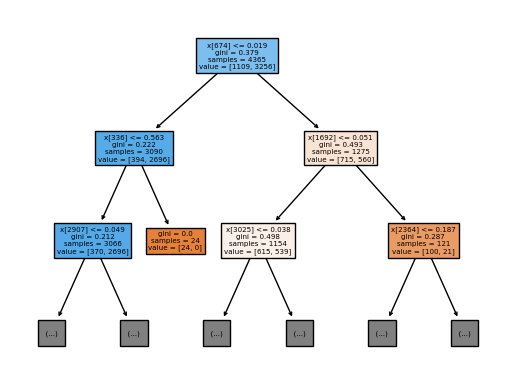

In [138]:
plot_tree(decisionTree.fit(X_train, y_train), max_depth=2, filled=True)

In [140]:
decisionTree.score(X_test, y_test)

0.794762159273116

<AxesSubplot: >

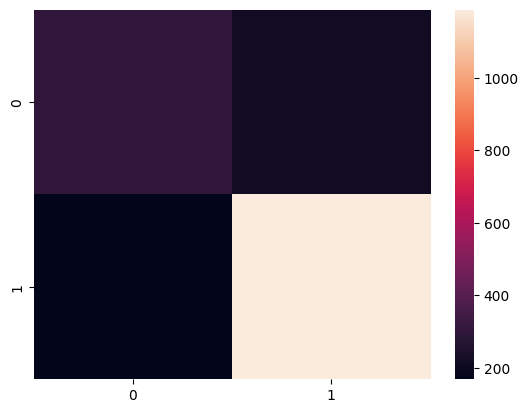

In [147]:
sns.heatmap(confusion_matrix(y_test, decisionTree.predict(X_test)))

In [136]:
randomForest = RandomForestClassifier()

In [137]:
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
randomForest.score(X_test, y_test)

0.8476750400855158

<AxesSubplot: >

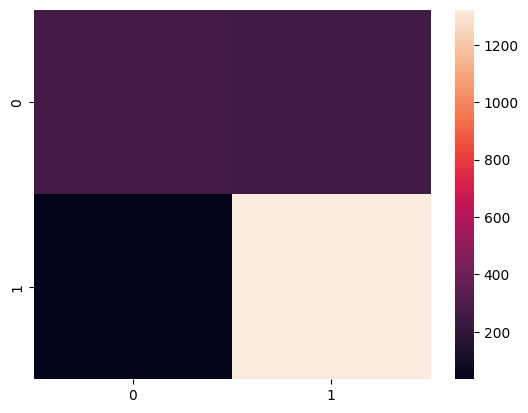

In [146]:
sns.heatmap(confusion_matrix(y_test, randomForest.predict(X_test)))

In [148]:
gaussianNb = GaussianNB()

In [149]:
gaussianNb.fit(X_train, y_train)

GaussianNB()

In [150]:
gaussianNb.score(X_test, y_test)

0.5205772314270444

<AxesSubplot: >

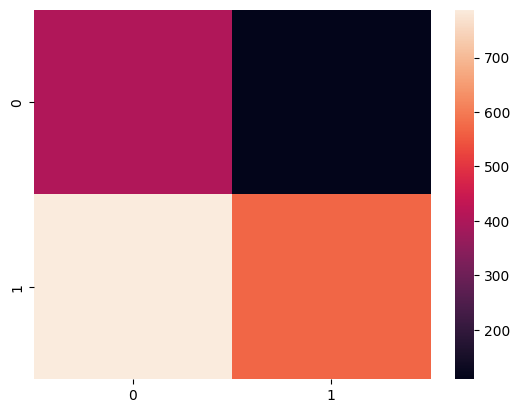

In [151]:
sns.heatmap(confusion_matrix(y_test, gaussianNb.predict(X_test)))

In [152]:
svc = SVC()

In [153]:
svc.fit(X_train, y_train)

SVC()

In [154]:
svc.score(X_test, y_test)

0.8444681988241582

<AxesSubplot: >

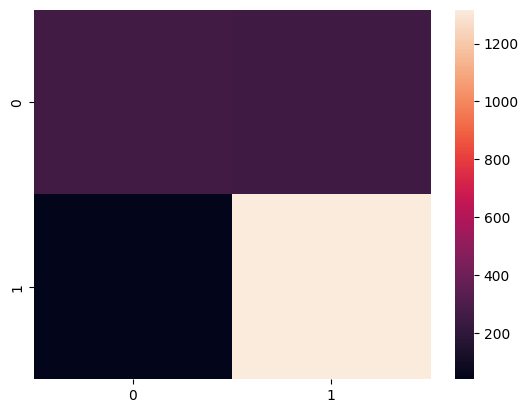

In [155]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)))

In [172]:
learning_curve(svc, X, y)

KeyboardInterrupt: 

In [156]:
perceptron = Perceptron()

In [157]:
perceptron.fit(X_train, y_train)

Perceptron()

In [158]:
perceptron.score(X_test, y_test)

0.8038482095136291

<AxesSubplot: >

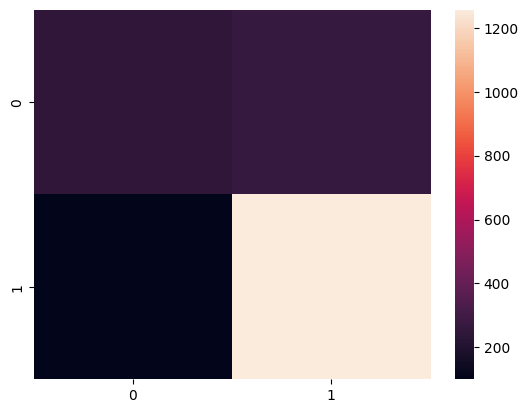

In [159]:
sns.heatmap(confusion_matrix(y_test, perceptron.predict(X_test)))

In [160]:
mlpc = MLPClassifier()

In [161]:
mlpc.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\envs\machine-learning-isimm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [ ]:
mlpc.score(X_test, y_test)

In [166]:
X.head(3)

,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,آدم,آذ,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
y.head(3)

0    مكية
1    مكية
2    مكية
Name: SORATYPE, dtype: object

In [168]:
svc.predict(X.head(3))

array(['مكية', 'مكية', 'مكية'], dtype=object)